In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC

In [3]:
df = pd.read_csv('2017.csv', header = None)
df.columns = ['Country', 'Rank', 'Score',  'GDP/C', 'Family', 'Health', 'Freedom', 
              'Generosity', 'Trust', 'Dystopia Residual','H_Whisker', 
              'L_Whisker']
df.head()


,Country,Rank,Score,GDP/C,Family,Health,Freedom,Generosity,Trust,Dystopia Residual,H_Whisker,L_Whisker
0,Norway+A2:L156,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,7.594445,7.479556
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,7.581728,7.462272
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,7.622030,7.385970
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,7.561772,7.426227
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,7.527542,7.410458


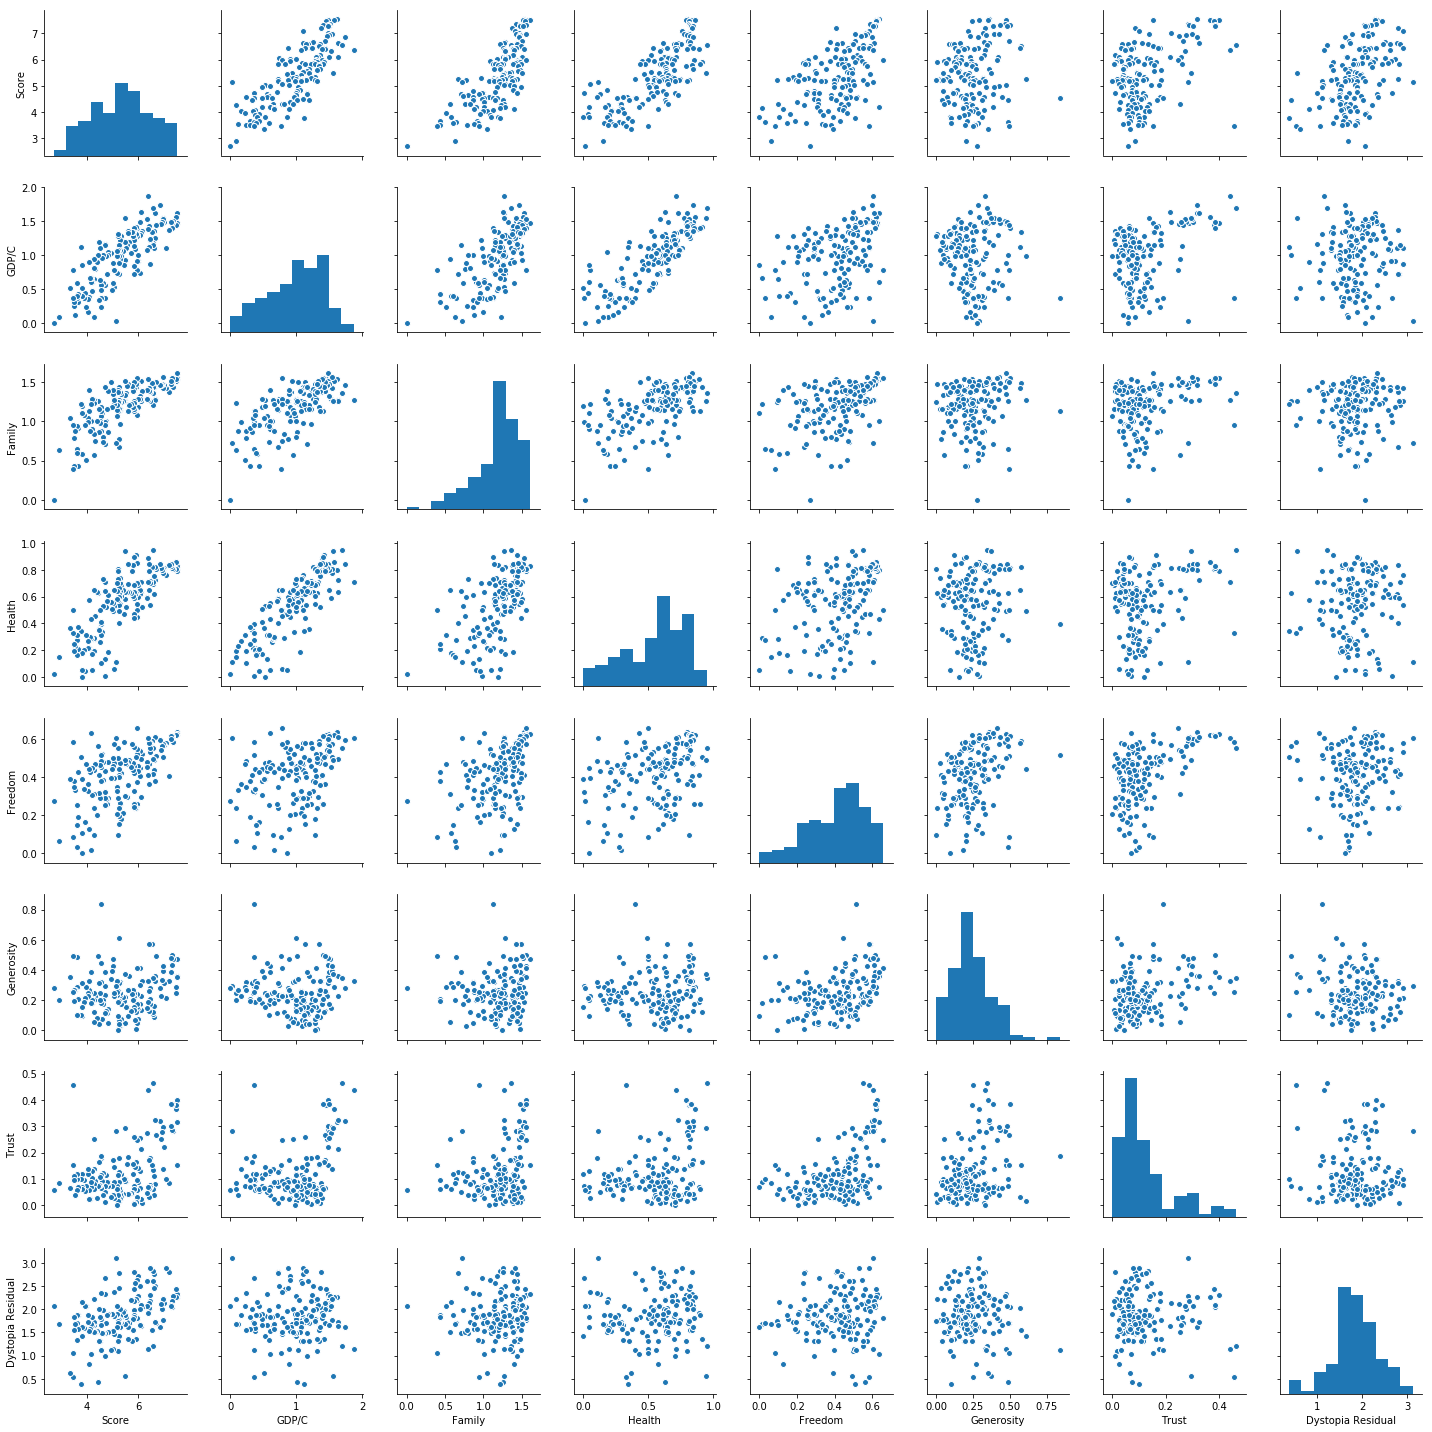

In [4]:
#visualize the relation between the fetures.
sns.pairplot(df[df.columns[2:10]], size=2.5)
plt.tight_layout()
plt.show()

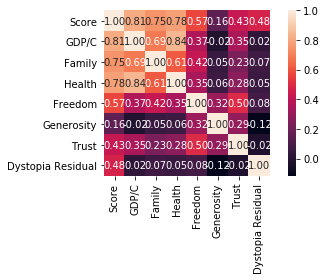

In [5]:
#so that some of feature has positive relation ship with the happyness score, 
#we can say that the score are actually depend on those features.
#Correlation coefficient
import numpy as np
cm = np.corrcoef(df[df.columns[2:10]].values.T)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=df.columns[2:10],
                 xticklabels=df.columns[2:10])

plt.tight_layout()
plt.show()

In [29]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v','.')
    colors = ('red', 'blue', 'lightgreen', 'brown', 'pink','yellow')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [67]:
from sklearn.model_selection import train_test_split
X = df[['GDP/C','Freedom']].values
y = df['Score'].values
for i in range(len(y)):
    y[i]=math.floor(y[i])
    
    
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
print("The accuracy of fitting GDP and Health is:")
svm.score(X_train_std, y_train)

The accuracy of fitting GDP and Health is:


0.5591397849462365

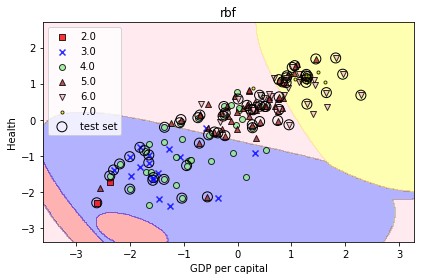

In [40]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(93, 155))
plt.title('rbf')
plt.xlabel('GDP per capital')
plt.ylabel('Health')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [65]:
from sklearn.model_selection import train_test_split
X = df[['Health','Freedom']].values
y = df['Score'].values
for i in range(len(y)):
    y[i]=math.floor(y[i])
    
    
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
print("The accuracy of fitting Health and Freedom is:")
svm.score(X_train_std, y_train)

The accuracy of fitting Health and Freedom is:


0.5698924731182796

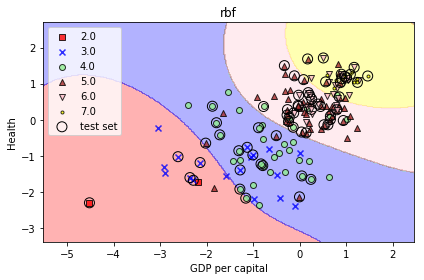

In [42]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(93, 155))
plt.title('rbf')
plt.xlabel('GDP per capital')
plt.ylabel('Health')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [68]:
X = df[['GDP/C','Family','Health','Freedom']].values
y = df['Score'].values
for i in range(len(y)):
    y[i]=math.floor(y[i])
    
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
print("The accuracy of fitting four feature is:")
svm.score(X_train_std, y_train)

The accuracy of fitting four feature is:


0.7526881720430108

In [78]:
X = df[['GDP/C', 'Family', 'Health', 'Freedom', 
              'Generosity', 'Trust','Dystopia Residual']].values
y = df['Score'].values
for i in range(len(y)):
    y[i]=math.floor(y[i])
    
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
print("The accuracy of fitting all features is:")
svm.score(X_train_std, y_train)

The accuracy of fitting all features is:


0.956989247311828

In [69]:
from sklearn.ensemble import AdaBoostClassifier
X = df[['GDP/C', 'Family', 'Health', 'Freedom']].values
y = df['Score'].values
for i in range(len(y)):
    y[i]=math.floor(y[i])
    
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1, stratify=y)

ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=500, 
                         learning_rate=0.1,
                         random_state=1)

ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

ada_train = accuracy_score(y_train, y_train_pred) 
ada_test = accuracy_score(y_test, y_test_pred) 
print('AdaBoost train/test accuracies %.3f/%.3f'
      % (ada_train, ada_test))

AdaBoost train/test accuracies 1.000/0.468


In [70]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
print ('Max Depth, decision tree Train/Test')
for i in range(1,10):
    tree = DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=i,
                                  random_state=1)
    
    tree = tree.fit(X_train, y_train)
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    tree_train = accuracy_score(y_train, y_train_pred)
    tree_test = accuracy_score(y_test, y_test_pred)
    print(str(i) +' %.3f/%.3f'
          % (tree_train, tree_test))

Max Depth, decision tree Train/Test
1 0.495/0.419
2 0.570/0.371
3 0.710/0.548
4 0.785/0.613
5 0.849/0.516
6 0.903/0.484
7 0.957/0.468
8 0.978/0.484
9 1.000/0.468


In [81]:
df = pd.read_csv('Hapiness.csv', header = None)
df.columns = [ 'Score',  'GDP/C', 'Family', 'Health', 'Freedom', 
              'Generosity', 'Trust', 'Dystopia Residual','H_Whisker', 
              'L_Whisker']
df.head()

,Score,GDP/C,Family,Health,Freedom,Generosity,Trust,Dystopia Residual,H_Whisker,L_Whisker
0,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,7.460,7.592
1,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,7.428,7.590
2,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,7.333,7.669
3,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,7.421,7.575
4,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,7.351,7.475


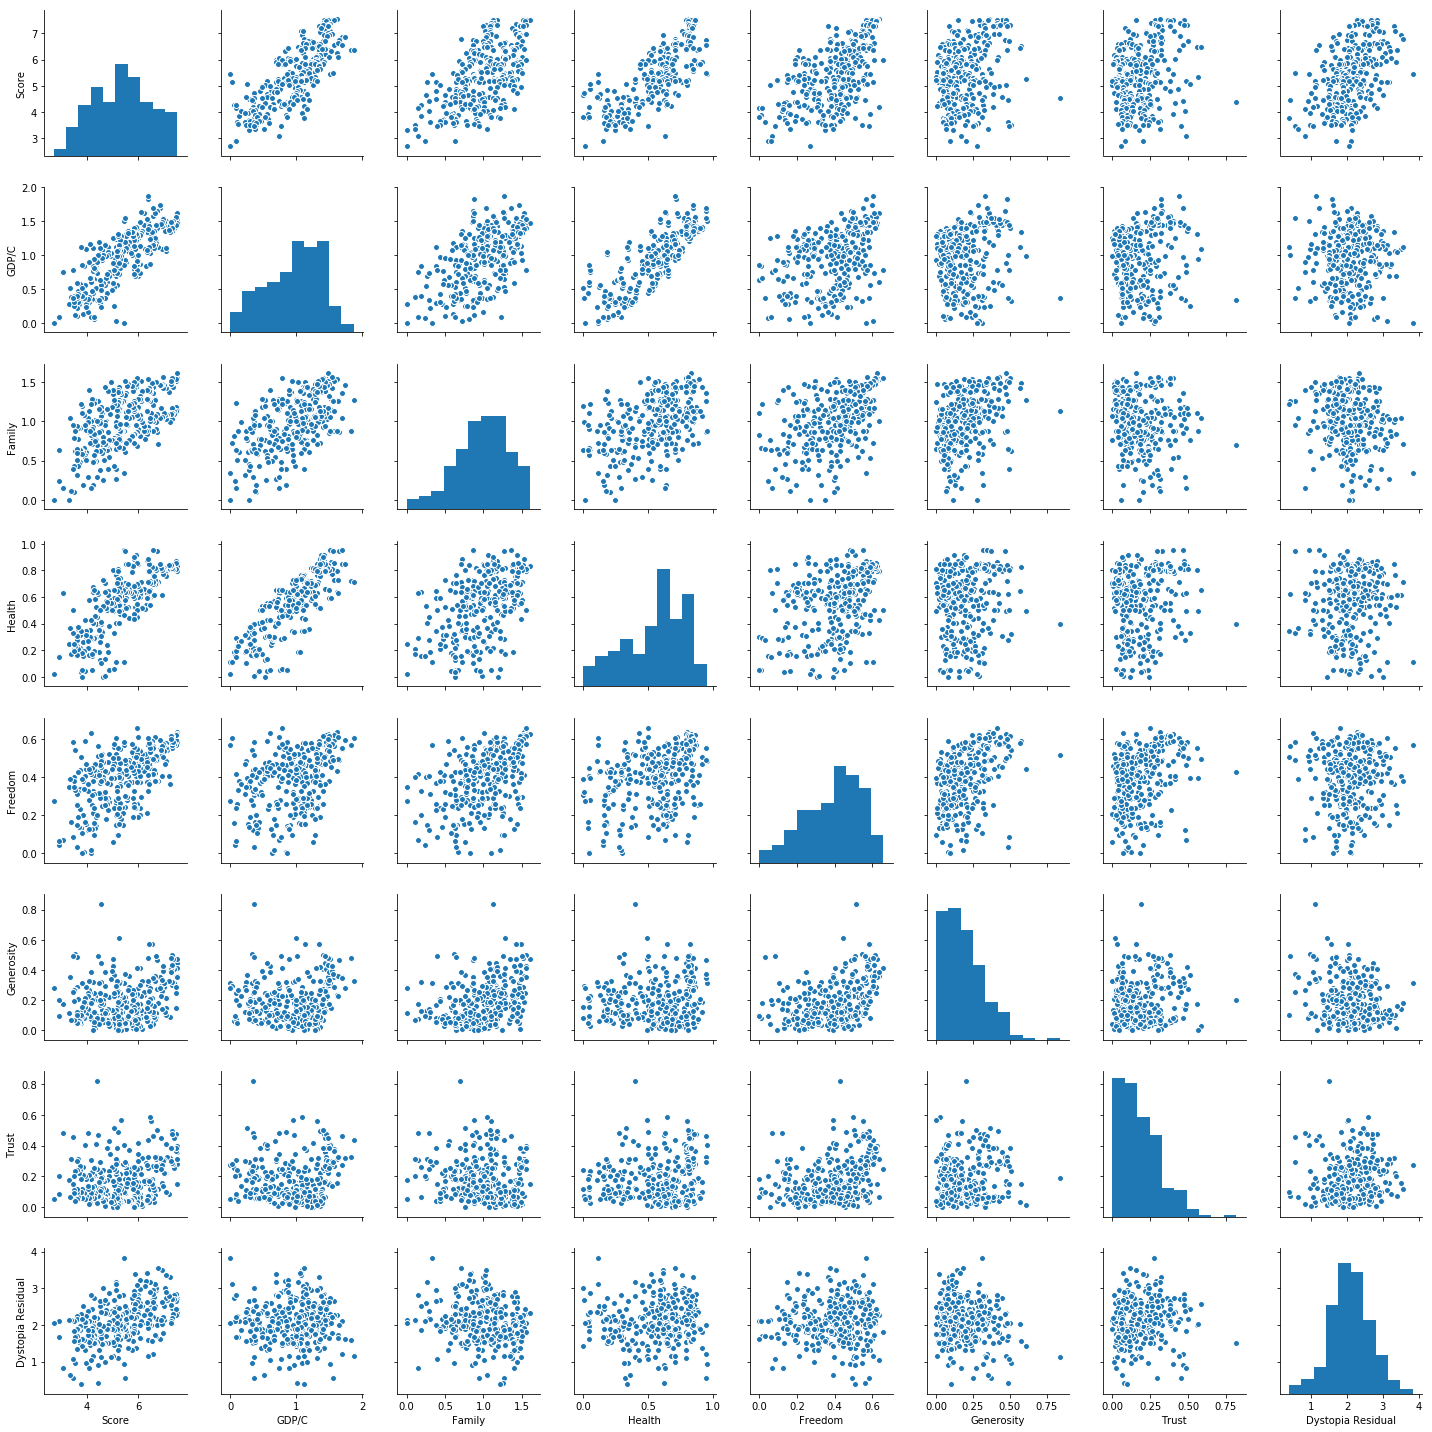

In [88]:
sns.pairplot(df[df.columns[:8]], size=2.5)
plt.tight_layout()
plt.show()

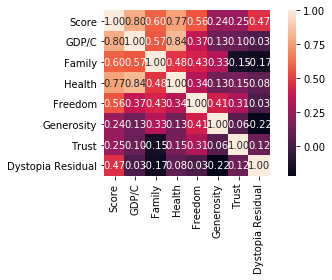

In [89]:
import numpy as np
cm = np.corrcoef(df[df.columns[:8]].values.T)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=df.columns[:8],
                 xticklabels=df.columns[:8])

plt.tight_layout()
plt.show()

In [94]:
X = df[['GDP/C', 'Family', 'Health', 'Freedom', 
              'Generosity', 'Trust','Dystopia Residual']].values
y = df['Score'].values
for i in range(len(y)):
    y[i]=math.floor(y[i])
    
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=2/3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
print("If train the data of 2015 and 2016, then test 2017,")
print("The accuracy of fitting all features is:")
svm.score(X_train_std, y_train)

If train the data of 2015 and 2016, then test 2017,
The accuracy of fitting all features is:


0.9134615384615384